## Module 4: General Linear Regression: Multiple Linear Regression and other regression models

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [5]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

archive_path = "California Housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
data['MedianHouseValue'] = california.target

Look at the data using `.info()` and `.describe()`.

In [6]:
# Display basic information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.4

### Step 1

Let the `X` variable be `MedInc`, `AveRooms`, and `HouseAge` and `y` be `MedianHouseValue`.

Then add the constant for the intercept.

Next, create the baseline model, called `baseline_model` using `smf.ols` for the above variables, and fit the model.

To verify the mdoel, return the $r^2$ value rounded to four decimal places.

In [8]:
# CodeGrade step1
df = data.copy()
target = df['MedianHouseValue']

baseline_model = smf.ols(formula='MedianHouseValue ~ MedInc + AveRooms + HouseAge', data=df).fit()

round(baseline_model.rsquared, 4)


0.5121

Now print the model summary.

In [10]:
# Print model summary
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7220.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        10:24:23   Log-Likelihood:                -24836.
No. Observations:               20640   AIC:                         4.968e+04
Df Residuals:                   20636   BIC:                         4.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0204      0.022      0.928      0.3

### Step 2


Add a quadratic term to the data called `MedInc_squared`, which is what it sounds like.

Now fit the model using `smf.ols` with the quadratic term, calling this model, `nonlinear_model`. Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.



In [11]:
# CodeGrade step2
df['MedInc_squared'] = df['MedInc'] ** 2
nonlinear_model = smf.ols(formula='MedianHouseValue ~ MedInc + MedInc_squared + AveRooms + HouseAge', data=df).fit()
round(nonlinear_model.rsquared, 6)


0.52017

Now print the model summary.

In [12]:
# Print the summary
print(nonlinear_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5592.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        10:25:48   Log-Likelihood:                -24664.
No. Observations:               20640   AIC:                         4.934e+04
Df Residuals:                   20635   BIC:                         4.938e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3310      0.029    -11.

### Step 3

Add (again) the same quadratic term, but now also add an interaction term that represents the interaction between `MedInc` and `AveRooms`.

Now fit the model using `smf.ols` with the quadratic term, calling this model, `interaction_model`.  Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.

In [13]:
# CodeGrade step3
interaction_model = smf.ols(formula='MedianHouseValue ~ MedInc + MedInc_squared + AveRooms + HouseAge + MedInc:AveRooms',data=df).fit()
round(interaction_model.rsquared, 6)


0.520213

Now print the model summary.

In [14]:
# Print the summary
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4475.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        10:27:49   Log-Likelihood:                -24663.
No. Observations:               20640   AIC:                         4.934e+04
Df Residuals:                   20634   BIC:                         4.939e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3027      0.036     

### Step 4

Add (again) the same quadratic term as in the previous two steps.

Create an indicator variable by
1.   Find the median of `MedInc`, call this `median_income_threshold`
2.   Adding a new variable to the data set callede `HighIncome` that assigns a 1 to any value strictly greater than the median, and otherwise it assigns a 0.

Now fit the model using `smf.ols` with the quadratic term and indicator variable, calling this model, `indicator_model`.  Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.

In [15]:
# CodeGrade step4
median_income_threshold = df['MedInc'].median()
df['HighIncome'] = (df['MedInc'] > median_income_threshold).astype(int)
indicator_model = smf.ols(formula='MedianHouseValue ~ MedInc + MedInc_squared + AveRooms + HouseAge + HighIncome',data=df).fit()
round(indicator_model.rsquared, 6)


0.520496

Now print the model summary.

In [17]:
# Print the summary
print(indicator_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4480.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        10:29:16   Log-Likelihood:                -24657.
No. Observations:               20640   AIC:                         4.933e+04
Df Residuals:                   20634   BIC:                         4.937e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3966      0.034    -11.

### Step 5

Add (again) the same quadratic term, but now also add an log transformed term of `AveRooms` called `log_AveRooms`.

Now fit the model using `smf.ols` with the quadratic term, calling this model, `log_model`.  Make sure to incluce the variables  `MedInc`, `AveRooms`, and `HouseAge` as well.

To verify the model, return the $r^2$ value rounded to six decimal places.

In [19]:
# CodeGrade step5
df['log_AveRooms'] = np.log(df['AveRooms'])
log_model = smf.ols(formula='MedianHouseValue ~ MedInc + MedInc_squared + log_AveRooms + HouseAge',data=df).fit()
round(log_model.rsquared, 6)


0.539497

Now print the model summary.

In [20]:
# Print the summary
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     6044.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        10:30:17   Log-Likelihood:                -24239.
No. Observations:               20640   AIC:                         4.849e+04
Df Residuals:                   20635   BIC:                         4.853e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5878      0.042     13.

### Step 6

Return the shape of `log_model`'s residuals.

In [23]:
# CodeGrade step6
log_model.resid.shape


(20640,)

Now for the log model, plot the resisuals vs. the fitted values and the Q-Q plot.

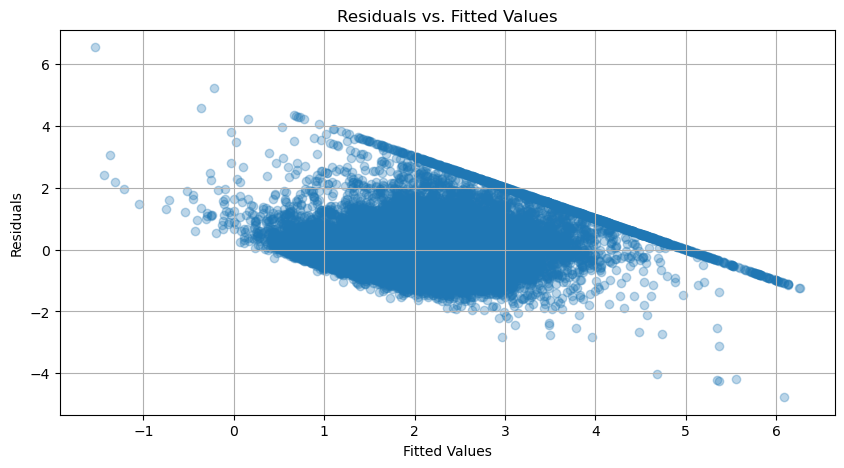

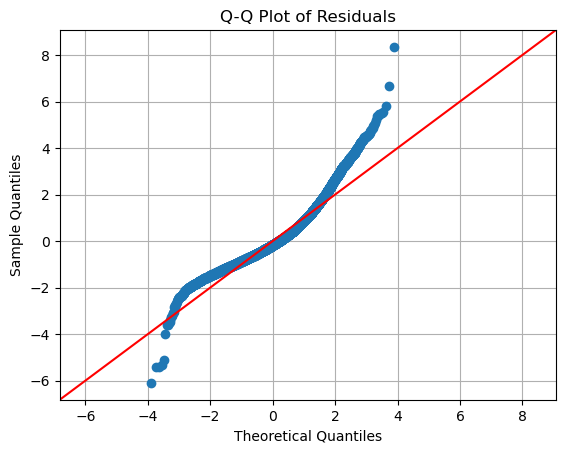

In [24]:
# Residuals vs. Fitted Plot
residuals = log_model.resid
fitted_values = log_model.fittedvalues
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, residuals, alpha=0.3)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()